
🔍 Evaluación completa para: Random Forest Regressor
─── TRAIN ───
R² Score:  0.9831
MAE:       1191.12 €
RMSE:      2813.15 €
MAPE:      5.31 %
─── TEST ───
R² Score:  0.9168
MAE:       2815.96 €
RMSE:      6259.70 €
MAPE:      13.93 %


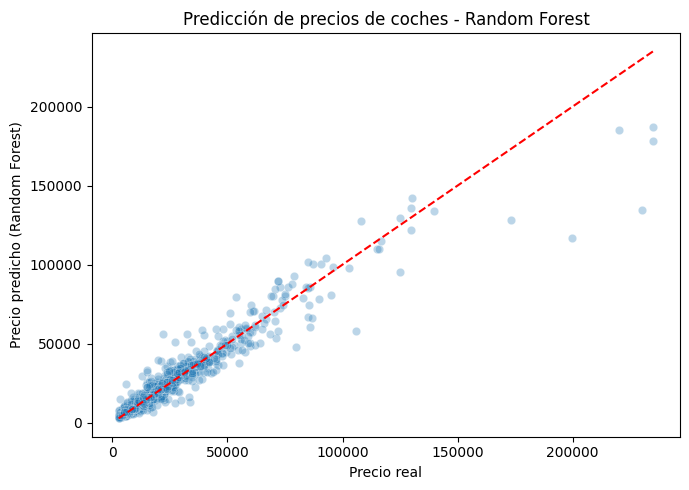

<ipython-input-1-a71832756733>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')


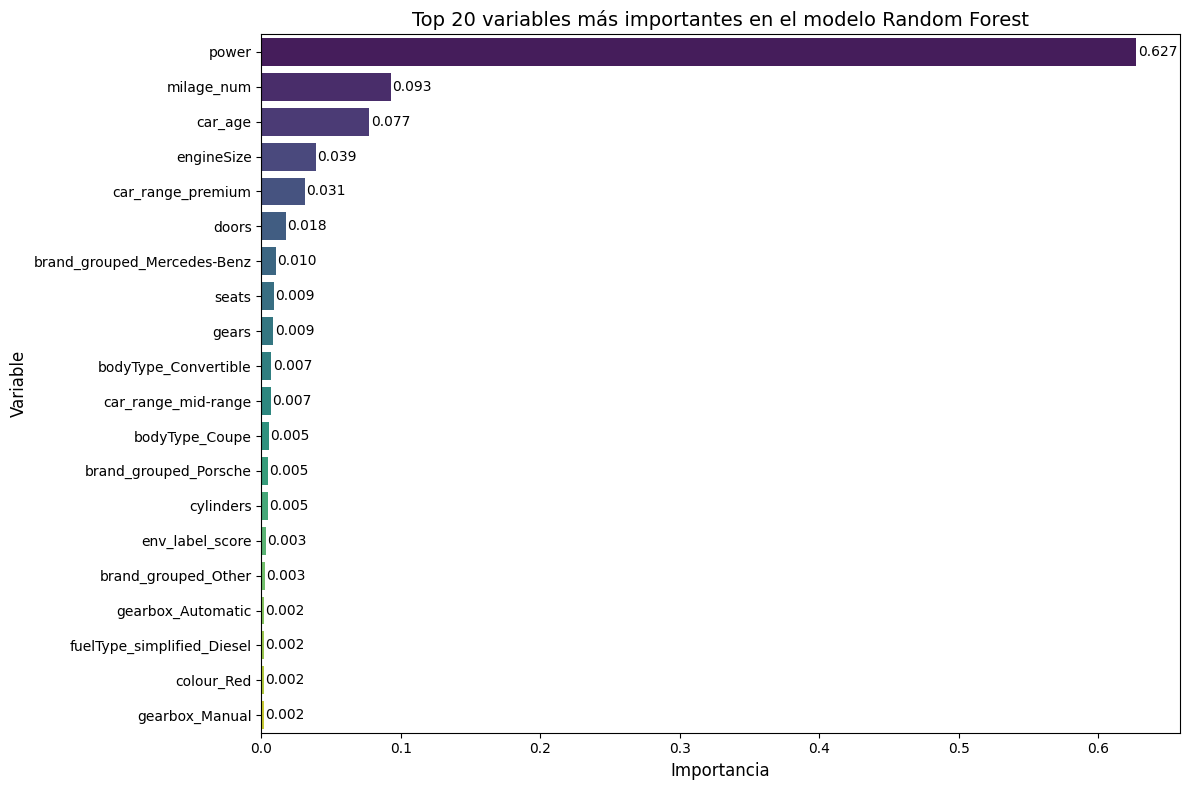

In [ ]:
# ✅ Instalar librerías necesarias (si aún no están)
!pip install scikit-learn matplotlib seaborn openpyxl --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ CARGAR EL DATASET (ajusta el nombre si es distinto)
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")

# ✅ SEPARAR VARIABLES EXPLICATIVAS Y OBJETIVO
X = df.drop(columns=['rawPrice'])  # Variables independientes
y = df['rawPrice']                 # Variable dependiente (target)

# ✅ DIVISIÓN EN TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 MODELO: RANDOM FOREST REGRESSOR
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ✅ FUNCIÓN DE EVALUACIÓN COMPLETA (incluye MAPE)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluar_modelo(y_true, y_pred, y_train_true, y_train_pred, nombre_modelo):
    print(f"\n🔍 Evaluación completa para: {nombre_modelo}")
    print("─── TRAIN ───")
    print(f"R² Score:  {r2_score(y_train_true, y_train_pred):.4f}")
    print(f"MAE:       {mean_absolute_error(y_train_true, y_train_pred):.2f} €")
    print(f"RMSE:      {np.sqrt(mean_squared_error(y_train_true, y_train_pred)):.2f} €")
    print(f"MAPE:      {mape(y_train_true, y_train_pred):.2f} %")
    print("─── TEST ───")
    print(f"R² Score:  {r2_score(y_true, y_pred):.4f}")
    print(f"MAE:       {mean_absolute_error(y_true, y_pred):.2f} €")
    print(f"RMSE:      {np.sqrt(mean_squared_error(y_true, y_pred)):.2f} €")
    print(f"MAPE:      {mape(y_true, y_pred):.2f} %")

# ✅ PREDICCIÓN EN TRAIN TAMBIÉN
y_train_pred = rf_model.predict(X_train)

# ✅ EVALUACIÓN
evaluar_modelo(y_test, y_pred_rf, y_train, y_train_pred, "Random Forest Regressor")

# ✅ VISUALIZACIÓN DE PREDICCIONES VS REALES
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho (Random Forest)")
plt.title("Predicción de precios de coches - Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# ✅ VISUALIZACIÓN DE IMPORTANCIA DE VARIABLES (TOP 20 con etiquetas mejoradas)
importances = rf_model.feature_importances_
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')

# Mostrar el valor encima de cada barra
for i, (valor, nombre) in enumerate(zip(importancia_df.head(20)['Importancia'], importancia_df.head(20)['Variable'])):
    plt.text(valor + 0.001, i, f"{valor:.3f}", va='center')

plt.title("Top 20 variables más importantes en el modelo Random Forest", fontsize=14)
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.tight_layout()
plt.show()



🔍 Evaluación completa para: Random Forest Regressor
─── TRAIN ───
R² Score:  0.9831
MAE:       1191.12 €
RMSE:      2813.15 €
MAPE:      5.31 %
─── TEST ───
R² Score:  0.9168
MAE:       2815.96 €
RMSE:      6259.70 €
MAPE:      13.93 %


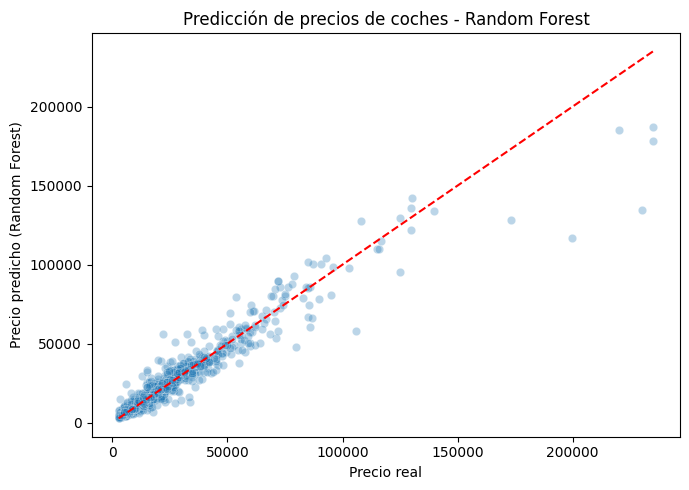

<ipython-input-2-aa7d13d4a768>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')


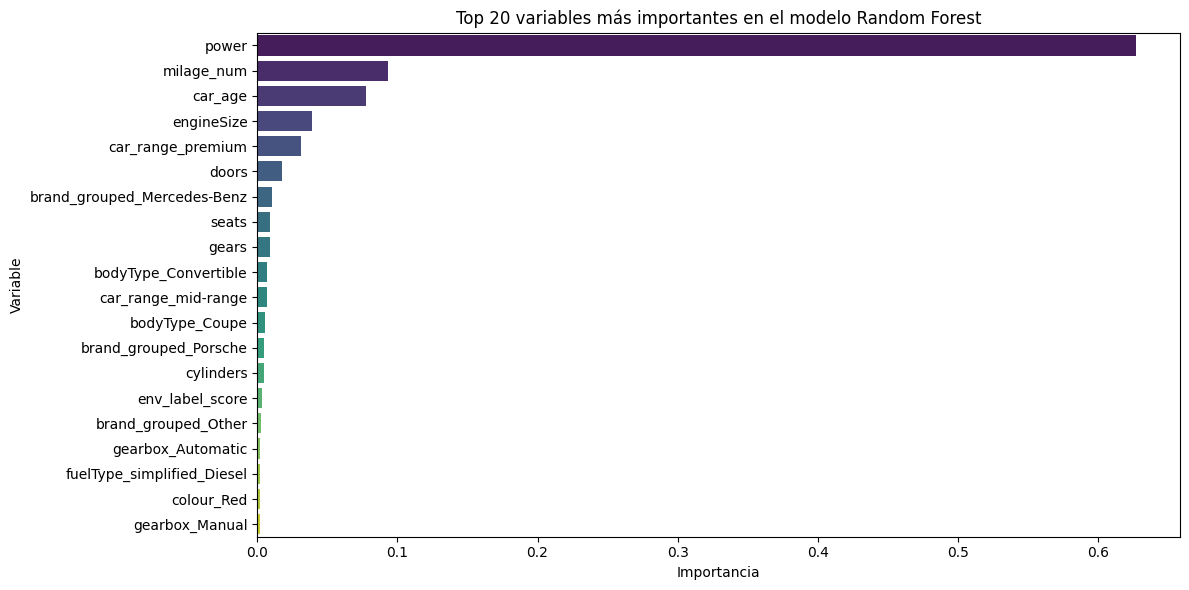

In [ ]:
# ✅ Instalar librerías necesarias
!pip install scikit-learn matplotlib seaborn openpyxl --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ CARGA DEL DATASET
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=["rawPrice"])
y = df["rawPrice"]

# ✅ SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ ENTRENAMIENTO RANDOM FOREST BÁSICO
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ PREDICCIONES
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# ✅ MÉTRICA MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ EVALUACIÓN
print("🔍 Evaluación completa para: Random Forest Regressor")
print("─── TRAIN ───")
print(f"R² Score:  {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_train, y_train_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
print(f"MAPE:      {mape(y_train, y_train_pred):.2f} %")
print("─── TEST ───")
print(f"R² Score:  {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_test, y_test_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
print(f"MAPE:      {mape(y_test, y_test_pred):.2f} %")

# ✅ GRÁFICO REAL VS PREDICHO
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho (Random Forest)")
plt.title("Predicción de precios de coches - Random Forest")
plt.tight_layout()
plt.show()

# ✅ IMPORTANCIA DE VARIABLES
importances = rf_model.feature_importances_
features = X.columns
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title("Top 20 variables más importantes en el modelo Random Forest")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 72 candidates, totalling 216 fits
🔍 Evaluación completa para: Random Forest Optimizado
─── TRAIN ───
R² Score:  0.9820
MAE:       1262.03 €
RMSE:      2901.95 €
MAPE:      6.27 %
─── TEST ───
R² Score:  0.9016
MAE:       3035.52 €
RMSE:      6807.14 €
MAPE:      16.29 %


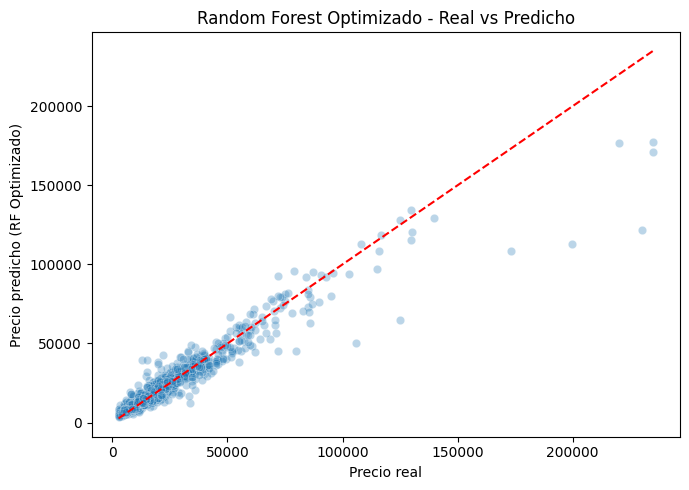

<ipython-input-3-ae0ad102e240>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')


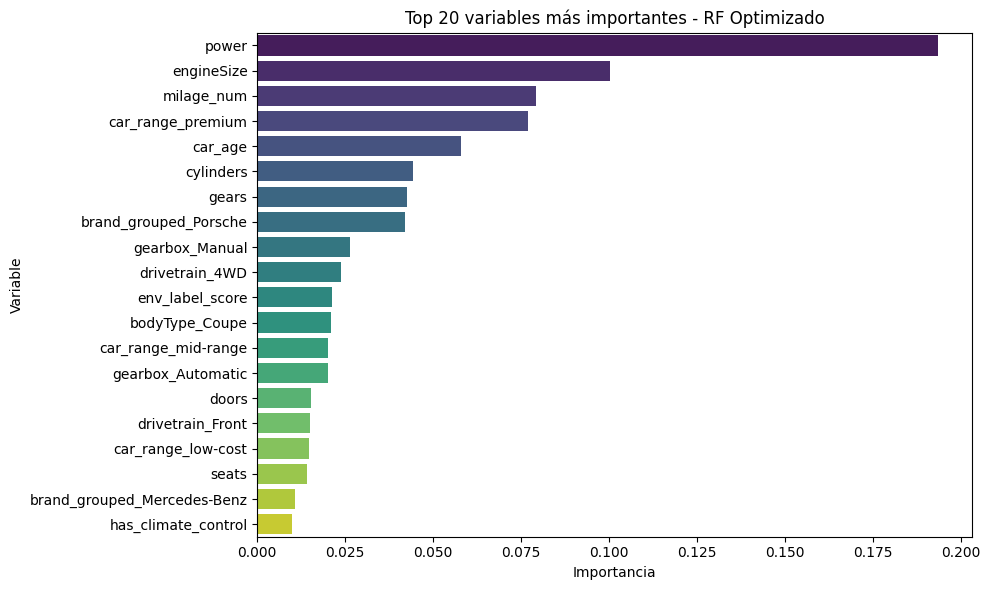

In [ ]:
# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ FUNCIÓN MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ CARGA DE DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# ✅ SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ DEFINICIÓN DE LA REJILLA DE HIPERPARÁMETROS
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# ✅ OPTIMIZACIÓN CON GRIDSEARCHCV
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

# ✅ PREDICCIONES
best_rf = grid_rf.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# ✅ EVALUACIÓN COMPLETA
print("🔍 Evaluación completa para: Random Forest Optimizado")
print("─── TRAIN ───")
print(f"R² Score:  {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_train, y_train_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
print(f"MAPE:      {mape(y_train, y_train_pred):.2f} %")
print("─── TEST ───")
print(f"R² Score:  {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_test, y_test_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
print(f"MAPE:      {mape(y_test, y_test_pred):.2f} %")

# ✅ VISUALIZACIÓN REAL VS PREDICHO
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho (RF Optimizado)")
plt.title("Random Forest Optimizado - Real vs Predicho")
plt.tight_layout()
plt.show()

# ✅ IMPORTANCIA DE VARIABLES
importances = best_rf.feature_importances_
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title("Top 20 variables más importantes - RF Optimizado")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
🔍 Evaluación completa para: Random Forest Optimizado (Refinado)
─── TRAIN ───
R² Score:  0.9840
MAE:       1205.97 €
RMSE:      2738.95 €
MAPE:      5.58 %
─── TEST ───
R² Score:  0.9220
MAE:       2763.38 €
RMSE:      6059.98 €
MAPE:      13.77 %


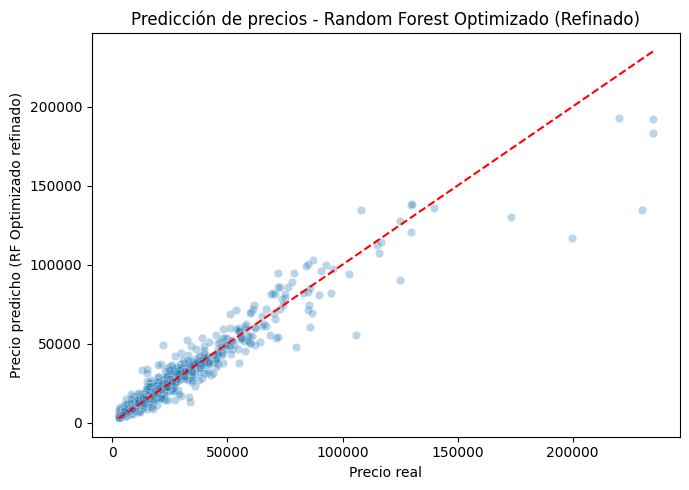

<ipython-input-2-3983321c72d6>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')


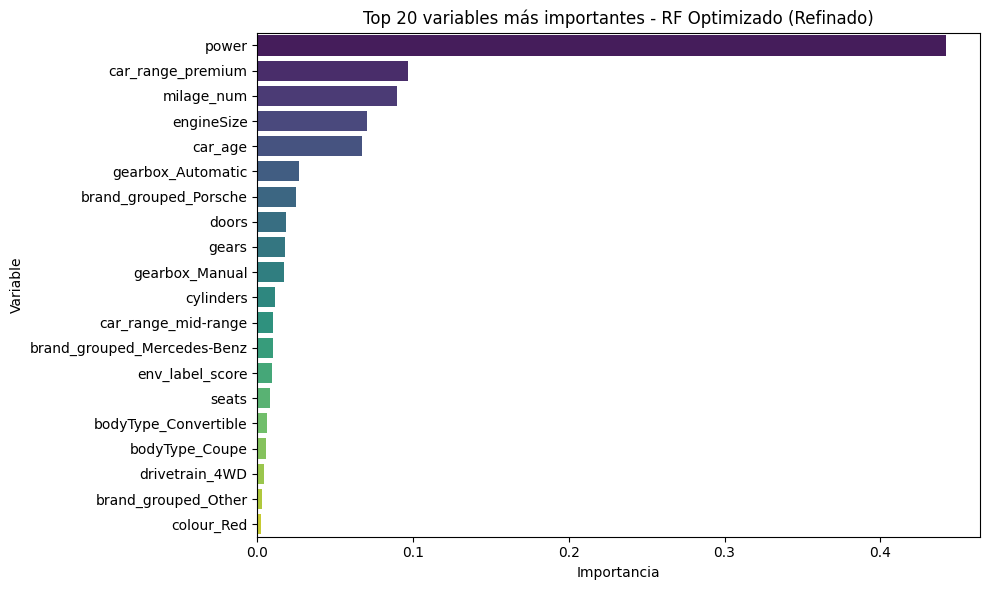

In [ ]:
# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ CARGA DE DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# ✅ SPLIT DE DATOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ NUEVA REJILLA DE HIPERPARÁMETROS MÁS PRECISA
param_grid_refinado = {
    'n_estimators': [100, 150, 200],
    'max_depth': [12, 16, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.3, 0.5]
}

# ✅ OPTIMIZACIÓN
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_refinado,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# ✅ PREDICCIONES
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# ✅ MÉTRICA MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ EVALUACIÓN
print("🔍 Evaluación completa para: Random Forest Optimizado (Refinado)")
print("─── TRAIN ───")
print(f"R² Score:  {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_train, y_train_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
print(f"MAPE:      {mape(y_train, y_train_pred):.2f} %")
print("─── TEST ───")
print(f"R² Score:  {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_test, y_test_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
print(f"MAPE:      {mape(y_test, y_test_pred):.2f} %")

# ✅ VISUALIZACIÓN
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho (RF Optimizado refinado)")
plt.title("Predicción de precios - Random Forest Optimizado (Refinado)")
plt.tight_layout()
plt.show()

# ✅ IMPORTANCIA DE VARIABLES
importances = best_rf.feature_importances_
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title("Top 20 variables más importantes - RF Optimizado (Refinado)")
plt.tight_layout()
plt.show()


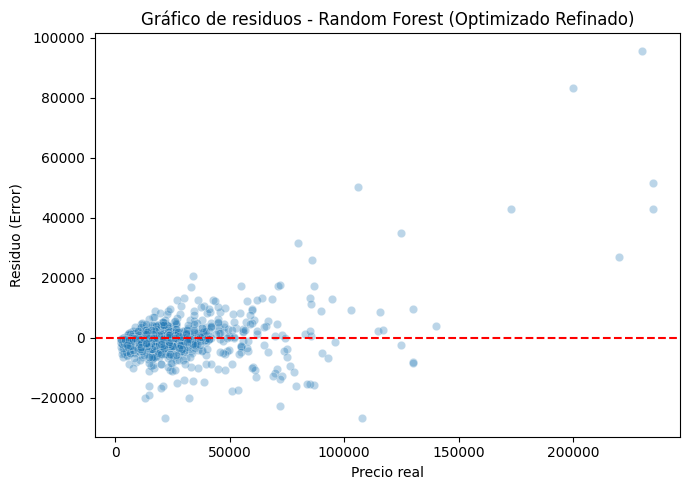

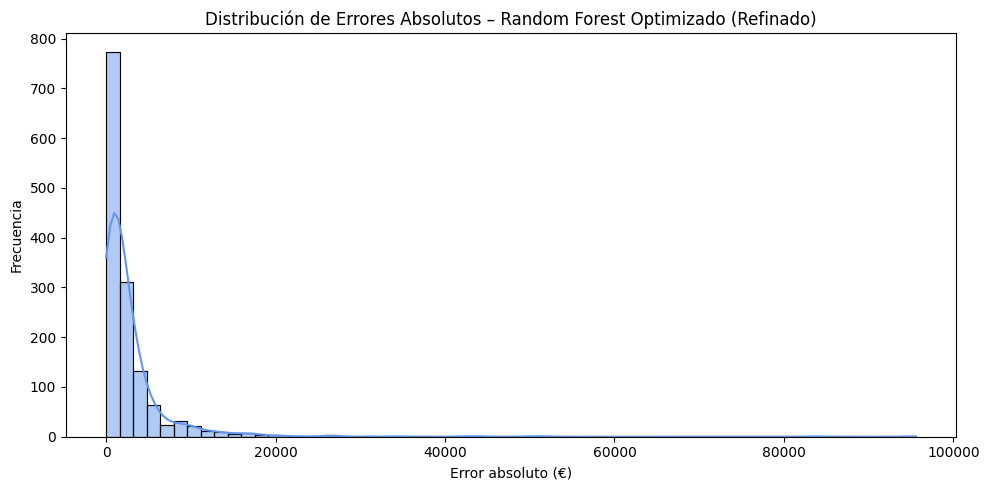

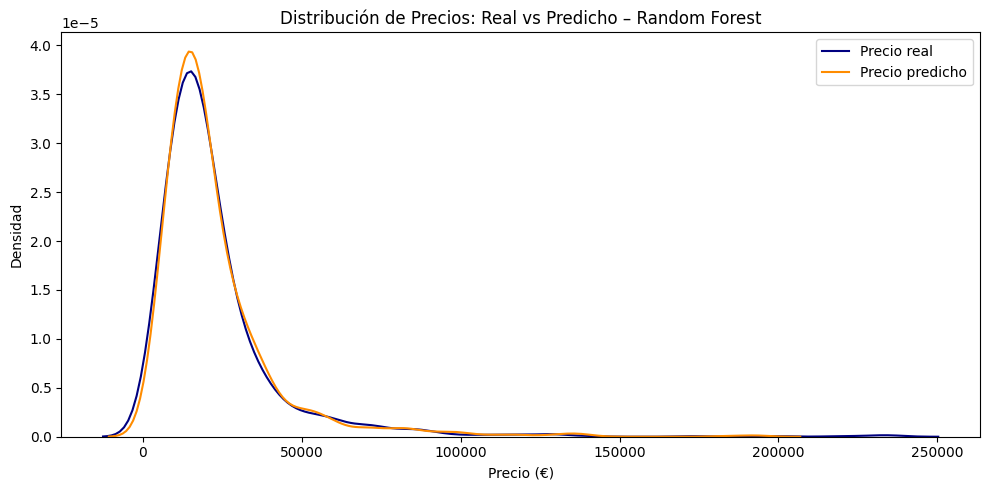

In [ ]:
# ✅ Cálculo del residuo
residuos_rf_refinado = y_test - y_test_pred

# ✅ Gráfico de residuos
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=residuos_rf_refinado, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Precio real")
plt.ylabel("Residuo (Error)")
plt.title("Gráfico de residuos - Random Forest (Optimizado Refinado)")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Errores absolutos (test)
errores_absolutos_rf = np.abs(y_test - y_test_pred)

# 📊 Gráfico 1: Distribución de errores absolutos
plt.figure(figsize=(10, 5))
sns.histplot(errores_absolutos_rf, bins=60, kde=True, color='cornflowerblue')
plt.title("Distribución de Errores Absolutos – Random Forest Optimizado (Refinado)")
plt.xlabel("Error absoluto (€)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 📊 Gráfico 2: Distribución del precio real vs predicho
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, label="Precio real", color='navy')
sns.kdeplot(y_test_pred, label="Precio predicho", color='darkorange')
plt.title("Distribución de Precios: Real vs Predicho – Random Forest")
plt.xlabel("Precio (€)")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()



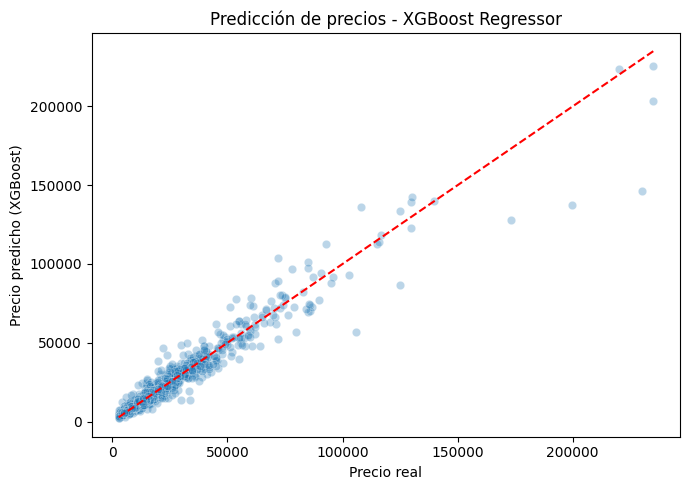

<ipython-input-12-d087a3082af8>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_xgb.head(20), x='Importancia', y='Variable', palette='viridis')


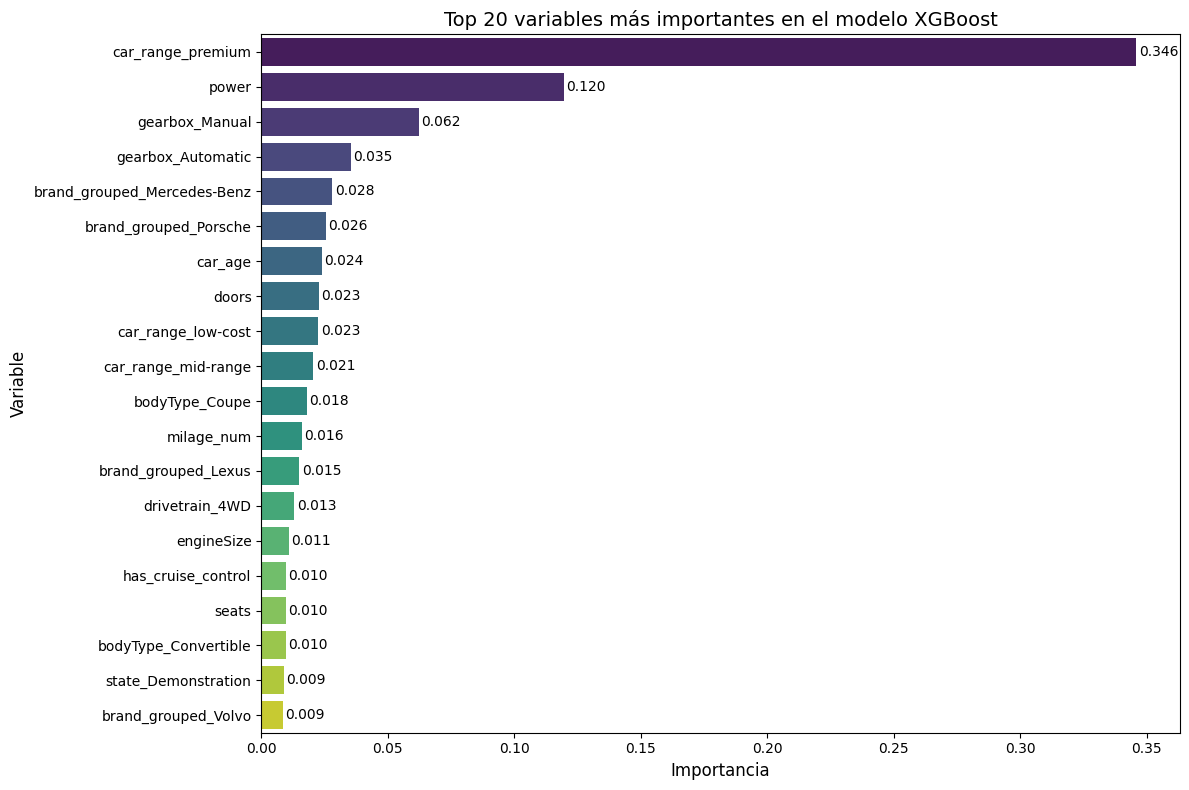

   R2_Train   R2_Test     MAE_Test    RMSE_Test  MAPE_Test
0  0.993959  0.936375  2718.851807  5472.962086   13.48796


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Separar variables explicativas y objetivo
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Función MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluación completa
resultados_xgb = {
    "R2_Train": r2_score(y_train, y_pred_train_xgb),
    "R2_Test": r2_score(y_test, y_pred_test_xgb),
    "MAE_Test": mean_absolute_error(y_test, y_pred_test_xgb),
    "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)),
    "MAPE_Test": mape(y_test, y_pred_test_xgb)
}

# Visualización Real vs Predicho
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_test_xgb, alpha=0.3)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho (XGBoost)")
plt.title("Predicción de precios - XGBoost Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# Importancia de variables
importancia_xgb = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': xgb_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=importancia_xgb.head(20), x='Importancia', y='Variable', palette='viridis')
for i, (valor, nombre) in enumerate(zip(importancia_xgb.head(20)['Importancia'], importancia_xgb.head(20)['Variable'])):
    plt.text(valor + 0.001, i, f"{valor:.3f}", va='center')
plt.title("Top 20 variables más importantes en el modelo XGBoost", fontsize=14)
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.tight_layout()
plt.show()

print(pd.DataFrame([resultados_xgb]))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5628, number of used features: 77
[LightGBM] [Info] Start training from score 23190.660981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

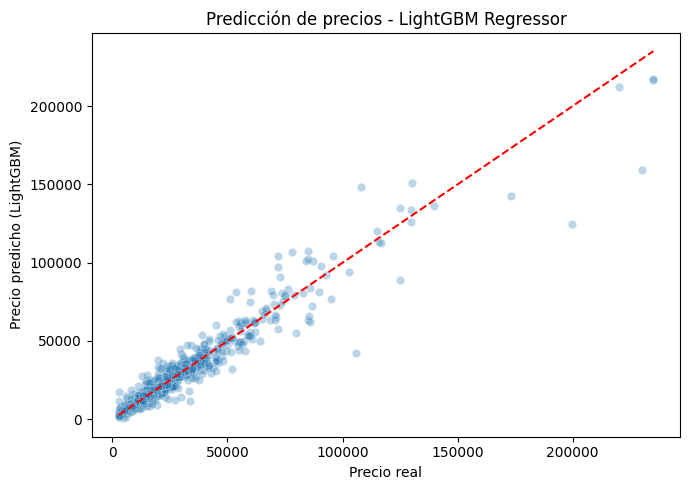

<ipython-input-13-2a2075f41894>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')


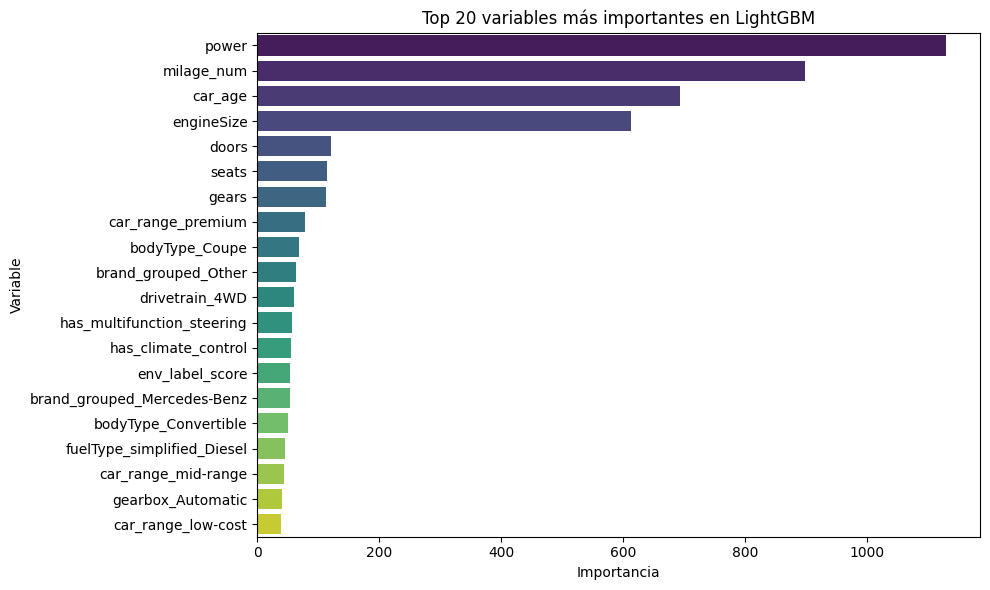

In [ ]:
# ✅ Instalar LightGBM si no está instalado
!pip install lightgbm --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ FUNCIÓN MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ CARGAR DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")

# ✅ SEPARAR VARIABLES
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# ✅ TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ ENTRENAR MODELO LIGHTGBM
lgbm_model = LGBMRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
lgbm_model.fit(X_train, y_train)

# ✅ PREDICCIONES
y_pred_train = lgbm_model.predict(X_train)
y_pred_test = lgbm_model.predict(X_test)

# ✅ EVALUACIÓN COMPLETA
def evaluar_modelo(nombre, y_train, y_train_pred, y_test, y_test_pred):
    print(f"\n🔍 Evaluación completa para: {nombre}")
    print("─── TRAIN ───")
    print(f"R² Score:  {r2_score(y_train, y_train_pred):.4f}")
    print(f"MAE:       {mean_absolute_error(y_train, y_train_pred):.2f} €")
    print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
    print(f"MAPE:      {mape(y_train, y_train_pred):.2f} %")
    print("─── TEST ───")
    print(f"R² Score:  {r2_score(y_test, y_test_pred):.4f}")
    print(f"MAE:       {mean_absolute_error(y_test, y_test_pred):.2f} €")
    print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
    print(f"MAPE:      {mape(y_test, y_test_pred):.2f} %")

evaluar_modelo("LightGBM Regressor", y_train, y_pred_train, y_test, y_pred_test)

# ✅ GRÁFICO REAL VS PREDICHO
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.3)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho (LightGBM)")
plt.title("Predicción de precios - LightGBM Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# ✅ IMPORTANCIA DE VARIABLES (TOP 20)
importancia = lgbm_model.feature_importances_
features = X.columns
importancia_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title("Top 20 variables más importantes en LightGBM")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [ ]:
# ✅ Instalar librerías necesarias
!pip install scikit-learn matplotlib seaborn openpyxl --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ CARGAR DATASET
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# ✅ DIVISIÓN TRAIN / TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ ESCALAR DATOS PARA REGRESIÓN PENALIZADA Y POLINÓMICA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ FUNCIÓN MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ FUNCIÓN EVALUACIÓN
def evaluar_modelo(nombre, y_train, y_train_pred, y_test, y_test_pred):
    print(f"\n🔍 Evaluación completa para: {nombre}")
    print("─── TRAIN ───")
    print(f"R² Score:  {r2_score(y_train, y_train_pred):.4f}")
    print(f"MAE:       {mean_absolute_error(y_train, y_train_pred):.2f} €")
    print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
    print(f"MAPE:      {mape(y_train, y_train_pred):.2f} %")
    print("─── TEST ───")
    print(f"R² Score:  {r2_score(y_test, y_test_pred):.4f}")
    print(f"MAE:       {mean_absolute_error(y_test, y_test_pred):.2f} €")
    print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
    print(f"MAPE:      {mape(y_test, y_test_pred):.2f} %")

# ✅ MODELO 1: Regresión lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
evaluar_modelo("Regresión Lineal", y_train, lr.predict(X_train_scaled), y_test, lr.predict(X_test_scaled))

# ✅ MODELO 2: Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
evaluar_modelo("Regresión Ridge", y_train, ridge.predict(X_train_scaled), y_test, ridge.predict(X_test_scaled))

# ✅ MODELO 3: Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
evaluar_modelo("Regresión Lasso", y_train, lasso.predict(X_train_scaled), y_test, lasso.predict(X_test_scaled))

# ✅ MODELO 4: Regresión Polinómica (grado 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)
evaluar_modelo("Regresión Polinómica (grado 2)", y_train, poly_model.predict(X_train_scaled), y_test, poly_model.predict(X_test_scaled))



🔍 Evaluación completa para: Regresión Lineal
─── TRAIN ───
R² Score:  0.7712
MAE:       5686.78 €
RMSE:      10345.41 €
MAPE:      33.42 %
─── TEST ───
R² Score:  0.7587
MAE:       5759.67 €
RMSE:      10657.63 €
MAPE:      36.36 %

🔍 Evaluación completa para: Regresión Ridge
─── TRAIN ───
R² Score:  0.7712
MAE:       5685.98 €
RMSE:      10345.41 €
MAPE:      33.41 %
─── TEST ───
R² Score:  0.7587
MAE:       5758.98 €
RMSE:      10657.80 €
MAPE:      36.35 %


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.034e+09, tolerance: 2.633e+08
  model = cd_fast.enet_coordinate_descent(



🔍 Evaluación completa para: Regresión Lasso
─── TRAIN ───
R² Score:  0.7712
MAE:       5686.61 €
RMSE:      10345.41 €
MAPE:      33.42 %
─── TEST ───
R² Score:  0.7587
MAE:       5759.46 €
RMSE:      10657.56 €
MAPE:      36.36 %

🔍 Evaluación completa para: Regresión Polinómica (grado 2)
─── TRAIN ───
R² Score:  0.9578
MAE:       2850.86 €
RMSE:      4443.10 €
MAPE:      16.57 %
─── TEST ───
R² Score:  0.4780
MAE:       6501.78 €
RMSE:      15675.70 €
MAPE:      42.26 %


In [ ]:
# ✅ INSTALAR LIBRERÍAS (si aún no están)
!pip install scikit-learn openpyxl --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ CARGAR DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# ✅ SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ MÉTRICA PERSONALIZADA: MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ FUNCIÓN DE EVALUACIÓN
def evaluar_modelo(nombre, modelo):
    y_train_pred = modelo.predict(X_train_scaled)
    y_test_pred = modelo.predict(X_test_scaled)
    print(f"\n🔍 {nombre}")
    print("─── TRAIN ───")
    print(f"R²:   {r2_score(y_train, y_train_pred):.4f}")
    print(f"MAE:  {mean_absolute_error(y_train, y_train_pred):.2f} €")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
    print(f"MAPE: {mape(y_train, y_train_pred):.2f} %")
    print("─── TEST ───")
    print(f"R²:   {r2_score(y_test, y_test_pred):.4f}")
    print(f"MAE:  {mean_absolute_error(y_test, y_test_pred):.2f} €")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
    print(f"MAPE: {mape(y_test, y_test_pred):.2f} %")

# ✅ ESCALAR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 1. REGRESIÓN LINEAL BASE
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
evaluar_modelo("Regresión Lineal Múltiple", lr)

# ✅ 2. RIDGE (Optimizado)
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_grid_ridge = {'ridge__alpha': np.logspace(-3, 3, 20)}
grid_ridge = GridSearchCV(ridge_pipe, param_grid_ridge, scoring='r2', cv=5)
grid_ridge.fit(X_train, y_train)
evaluar_modelo("Ridge Optimizado", grid_ridge.best_estimator_)

# ✅ 3. LASSO (Optimizado)
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
param_grid_lasso = {'lasso__alpha': np.logspace(-3, 1, 20)}
grid_lasso = GridSearchCV(lasso_pipe, param_grid_lasso, scoring='r2', cv=5)
grid_lasso.fit(X_train, y_train)
evaluar_modelo("Lasso Optimizado", grid_lasso.best_estimator_)

# ✅ 4. REGRESIÓN POLINÓMICA PURO (sin penalizar)
poly_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])
param_grid_poly = {'poly__degree': [2, 3, 4]}
grid_poly = GridSearchCV(poly_pipe, param_grid_poly, scoring='r2', cv=5)
grid_poly.fit(X_train, y_train)
evaluar_modelo("Regresión Polinómica Optimizada", grid_poly.best_estimator_)

# ✅ 5. REGRESIÓN POLINÓMICA PENALIZADA (Ridge + Polinómica)
poly_ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])
param_grid_poly_ridge = {
    'poly__degree': [2, 3],
    'ridge__alpha': np.logspace(-2, 2, 10)
}
grid_poly_ridge = GridSearchCV(poly_ridge_pipe, param_grid_poly_ridge, scoring='r2', cv=5)
grid_poly_ridge.fit(X_train, y_train)
evaluar_modelo("Polinómica Penalizada (Ridge)", grid_poly_ridge.best_estimator_)



🔍 Regresión Lineal Múltiple
─── TRAIN ───
R²:   0.7712
MAE:  5686.78 €
RMSE: 10345.41 €
MAPE: 33.42 %
─── TEST ───
R²:   0.7587
MAE:  5759.67 €
RMSE: 10657.63 €
MAPE: 36.36 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



🔍 Ridge Optimizado
─── TRAIN ───
R²:   -0.6615
MAE:  15057.41 €
RMSE: 27878.58 €
MAPE: 86.54 %
─── TEST ───
R²:   -0.5680
MAE:  15127.73 €
RMSE: 27169.07 €
MAPE: 95.36 %


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.551e+10, tolerance: 2.144e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.274e+10, tolerance: 2.110e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+10, tolerance: 1.951e


🔍 Lasso Optimizado
─── TRAIN ───
R²:   -0.5847
MAE:  14077.14 €
RMSE: 27225.90 €
MAPE: 81.48 %
─── TEST ───
R²:   -0.4377
MAE:  13920.09 €
RMSE: 26016.46 €
MAPE: 90.15 %


🔍 Evaluación completa para: Regresión Lineal Múltiple
─── TRAIN ───
R² Score:  0.7712
MAE:       5686.78 €
RMSE:      10345.41 €
MAPE:      33.42 %
─── TEST ───
R² Score:  0.7587
MAE:       5759.67 €
RMSE:      10657.63 €
MAPE:      36.36 %


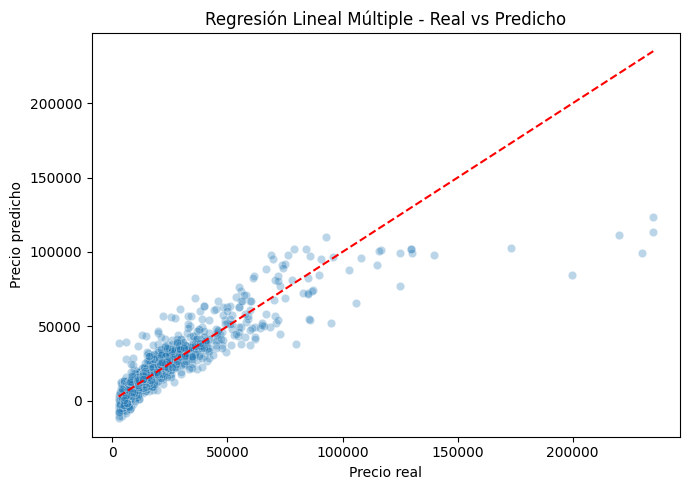

In [ ]:
# ✅ Instalar librerías necesarias (si no lo has hecho ya)
!pip install scikit-learn matplotlib seaborn openpyxl --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ CARGA DEL DATASET
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")  # cambia la ruta si es necesario

# ✅ SEPARAR VARIABLES
X = df.drop(columns=['rawPrice'])  # Variables explicativas
y = df['rawPrice']                 # Variable objetivo

# ✅ ESCALADO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ SPLIT EN TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ ENTRENAMIENTO DEL MODELO
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ✅ PREDICCIONES
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# ✅ FUNCIÓN MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ EVALUACIÓN
print("🔍 Evaluación completa para: Regresión Lineal Múltiple")
print("─── TRAIN ───")
print(f"R² Score:  {r2_score(y_train, y_pred_train):.4f}")
print(f"MAE:       {mean_absolute_error(y_train, y_pred_train):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f} €")
print(f"MAPE:      {mape(y_train, y_pred_train):.2f} %")
print("─── TEST ───")
print(f"R² Score:  {r2_score(y_test, y_pred_test):.4f}")
print(f"MAE:       {mean_absolute_error(y_test, y_pred_test):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f} €")
print(f"MAPE:      {mape(y_test, y_pred_test):.2f} %")

# ✅ GRÁFICO: Precio real vs predicho
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Regresión Lineal Múltiple - Real vs Predicho")
plt.tight_layout()
plt.show()


🔍 Evaluación modelo ajustado (log-transformed)
─── TRAIN ───
R² Score:  0.8373
MAE:       4034.94 €
RMSE:      8723.60 €
MAPE:      16.58 %
─── TEST ───
R² Score:  0.8530
MAE:       3844.99 €
RMSE:      8317.89 €
MAPE:      16.76 %


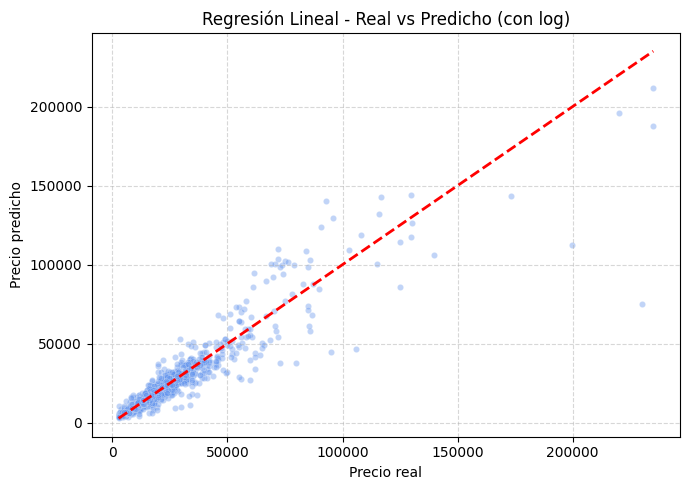

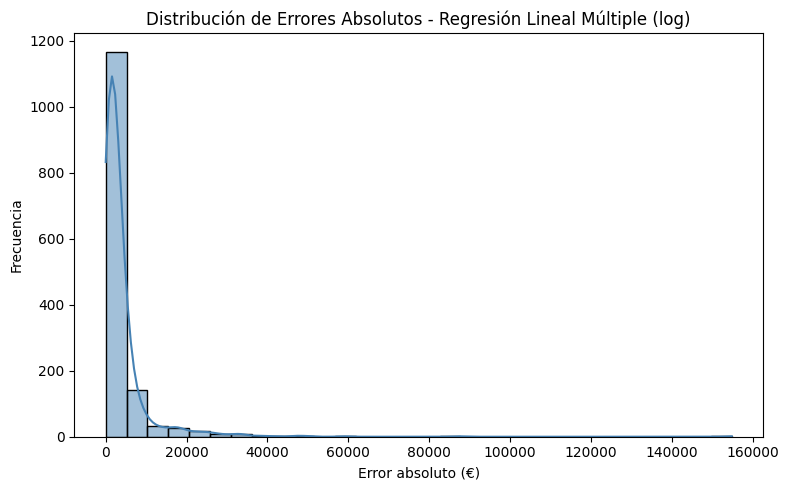

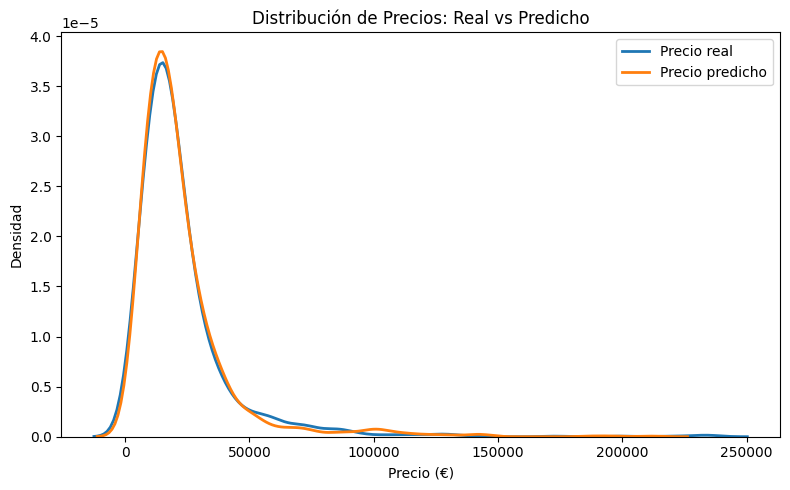

In [ ]:
# ✅ INSTALACIONES NECESARIAS (si no lo has hecho aún)
!pip install scikit-learn matplotlib seaborn openpyxl --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ CARGA DEL DATASET
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# ✅ TRANSFORMACIÓN LOGARÍTMICA DE LA VARIABLE OBJETIVO
y_log = np.log1p(y)  # log(1 + rawPrice)

# ✅ ESCALADO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ SPLIT
X_train, X_test, y_train_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# ✅ ENTRENAMIENTO DEL MODELO LINEAL
lr = LinearRegression()
lr.fit(X_train, y_train_log)

# ✅ PREDICCIONES (en escala logarítmica)
y_train_pred_log = lr.predict(X_train)
y_test_pred_log = lr.predict(X_test)

# ✅ INVERSA: volver a escala real
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train_real = np.expm1(y_train_log)
y_test_real = np.expm1(y_test_log)

# ✅ MÉTRICAS
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("🔍 Evaluación modelo ajustado (log-transformed)")
print("─── TRAIN ───")
print(f"R² Score:  {r2_score(y_train_real, y_train_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_train_real, y_train_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_train_real, y_train_pred)):.2f} €")
print(f"MAPE:      {mape(y_train_real, y_train_pred):.2f} %")
print("─── TEST ───")
print(f"R² Score:  {r2_score(y_test_real, y_test_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_test_real, y_test_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test_real, y_test_pred)):.2f} €")
print(f"MAPE:      {mape(y_test_real, y_test_pred):.2f} %")

plt.figure(figsize=(7, 5))
plt.scatter(y_test_real, y_test_pred, alpha=0.4, s=20, color='cornflowerblue', edgecolor='w', linewidth=0.3)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()],
         'r--', linewidth=2)  # Línea diagonal correcta
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Regresión Lineal - Real vs Predicho (con log)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Cálculo de errores absolutos
errores_absolutos = np.abs(y_real - y_pred)

# Gráfico 1: Distribución de errores absolutos
plt.figure(figsize=(8, 5))
sns.histplot(errores_absolutos, bins=30, kde=True, color="steelblue")
plt.title("Distribución de Errores Absolutos - Regresión Lineal Múltiple (log)")
plt.xlabel("Error absoluto (€)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de precios reales vs predichos
plt.figure(figsize=(8, 5))
sns.kdeplot(y_real, label="Precio real", linewidth=2)
sns.kdeplot(y_pred, label="Precio predicho", linewidth=2)
plt.title("Distribución de Precios: Real vs Predicho")
plt.xlabel("Precio (€)")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()




<ipython-input-4-c593a662d874>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(20), x='Coeficiente', y='Variable', palette='coolwarm')


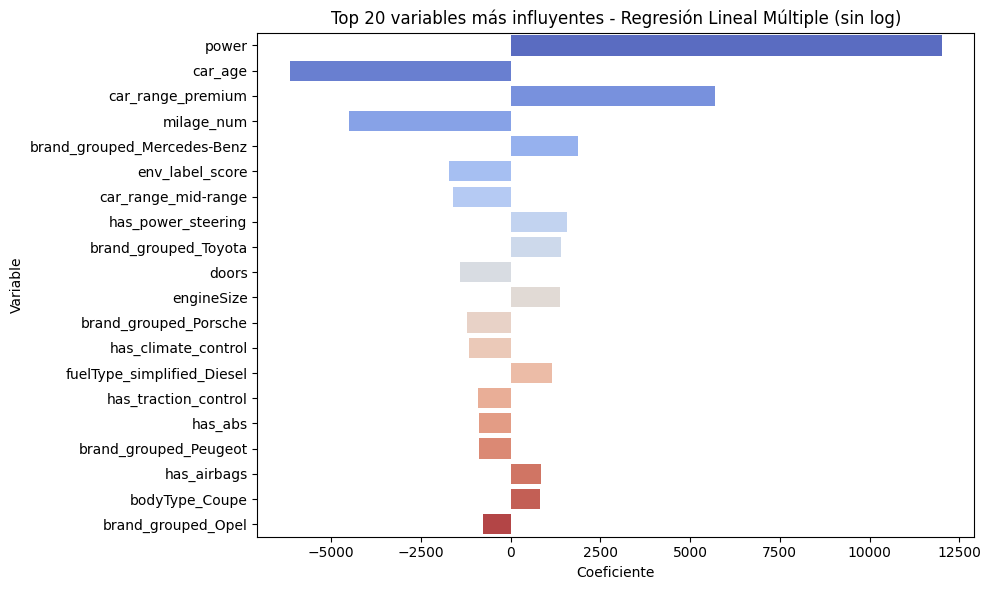

In [ ]:
# ✅ Instalar librerías necesarias
!pip install scikit-learn matplotlib seaborn openpyxl --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ CARGAR DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# ✅ ESCALADO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ ENTRENAR MODELO
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ✅ IMPORTANCIA DE VARIABLES (COEFICIENTES)
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr_model.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# ✅ VISUALIZACIÓN
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(20), x='Coeficiente', y='Variable', palette='coolwarm')
plt.title("Top 20 variables más influyentes - Regresión Lineal Múltiple (sin log)")
plt.xlabel("Coeficiente")
plt.tight_layout()
plt.show()


<ipython-input-3-66af120313ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(20), x='Coeficiente', y='Variable', palette='coolwarm')


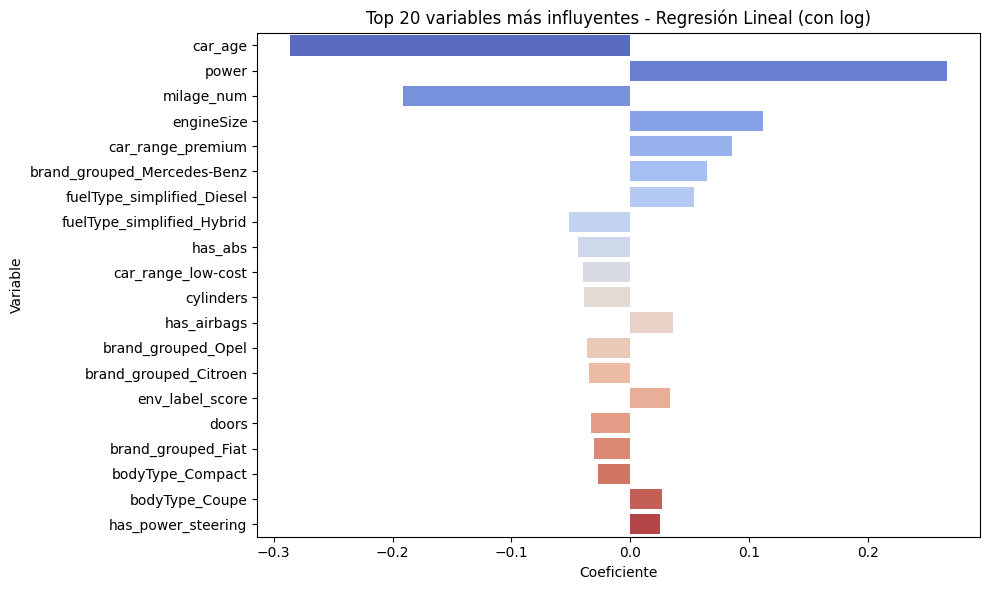

,Variable,Coeficiente
7,car_age,-0.286210
4,power,0.266910
6,milage_num,-0.191379
2,engineSize,0.111751
58,car_range_premium,0.085581
68,brand_grouped_Mercedes-Benz,0.065105
53,fuelType_simplified_Diesel,0.053608
55,fuelType_simplified_Hybrid,-0.051037
13,has_abs,-0.043733
56,car_range_low-cost,-0.040064


In [ ]:
# Obtener importancia de variables para el modelo de regresión lineal ajustado con log(rawPrice)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Mostrar gráfico de los 20 coeficientes más influyentes
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(20), x='Coeficiente', y='Variable', palette='coolwarm')
plt.title("Top 20 variables más influyentes - Regresión Lineal (con log)")
plt.tight_layout()
plt.show()

coef_df.head(20)


In [ ]:
# ✅ Cálculo de residuos (error = real - predicho)
residuos_lr_log = y_test_real - y_test_pred

# ✅ Gráfico de residuos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_real, y=residuos_lr_log, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Precio real")
plt.ylabel("Residuo (Error)")
plt.title("Gráfico de residuos - Regresión Lineal Múltiple (log)")
plt.tight_layout()
plt.show()




NameError: name 'y_test_real' is not defined

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5628, number of used features: 77
[LightGBM] [Info] Start training from score 23190.660981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

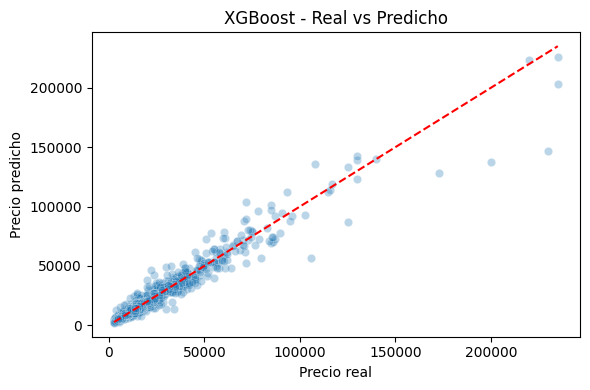

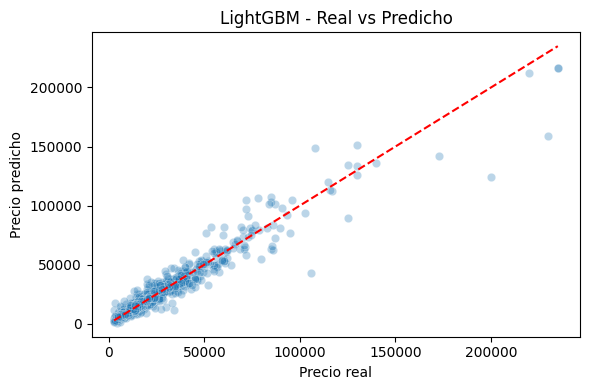

In [ ]:
# ✅ INSTALACIÓN
!pip install xgboost lightgbm --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ CARGA DE DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=["rawPrice"])
y = df["rawPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ MODELO XGBOOST
xgb = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, subsample=0.8,
                   colsample_bytree=0.8, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# ✅ MODELO LIGHTGBM
lgbm = LGBMRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# ✅ MÉTRICAS
def evaluar(nombre, y_true, y_pred):
    print(f"\n🔍 Resultados para: {nombre}")
    print(f"R² Score:  {r2_score(y_true, y_pred):.4f}")
    print(f"MAE:       {mean_absolute_error(y_true, y_pred):.2f} €")
    print(f"RMSE:      {np.sqrt(mean_squared_error(y_true, y_pred)):.2f} €")
    print(f"MAPE:      {mape(y_true, y_pred):.2f} %")

evaluar("XGBoost", y_test, y_pred_xgb)
evaluar("LightGBM", y_test, y_pred_lgbm)

# ✅ GRÁFICO COMPARATIVO XGBOOST
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("XGBoost - Real vs Predicho")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.tight_layout()
plt.show()

# ✅ GRÁFICO COMPARATIVO LIGHTGBM
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_lgbm, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("LightGBM - Real vs Predicho")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.tight_layout()
plt.show()


🔍 Evaluación completa para: XGBoost Base
─── TRAIN ───
R² Score:  0.9940
MAE:       1205.48 €
RMSE:      1680.95 €
MAPE:      7.14 %
─── TEST ───
R² Score:  0.9364
MAE:       2718.85 €
RMSE:      5472.96 €
MAPE:      13.49 %


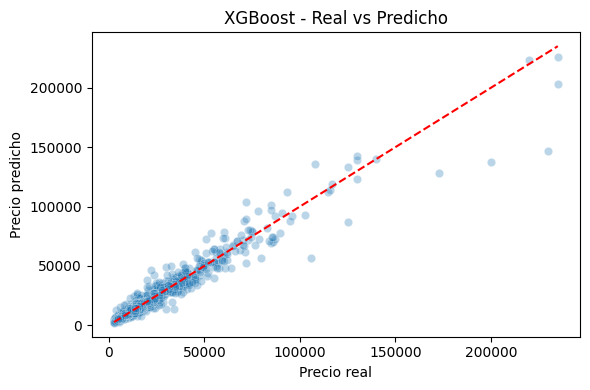

<ipython-input-6-15541438e27b>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')


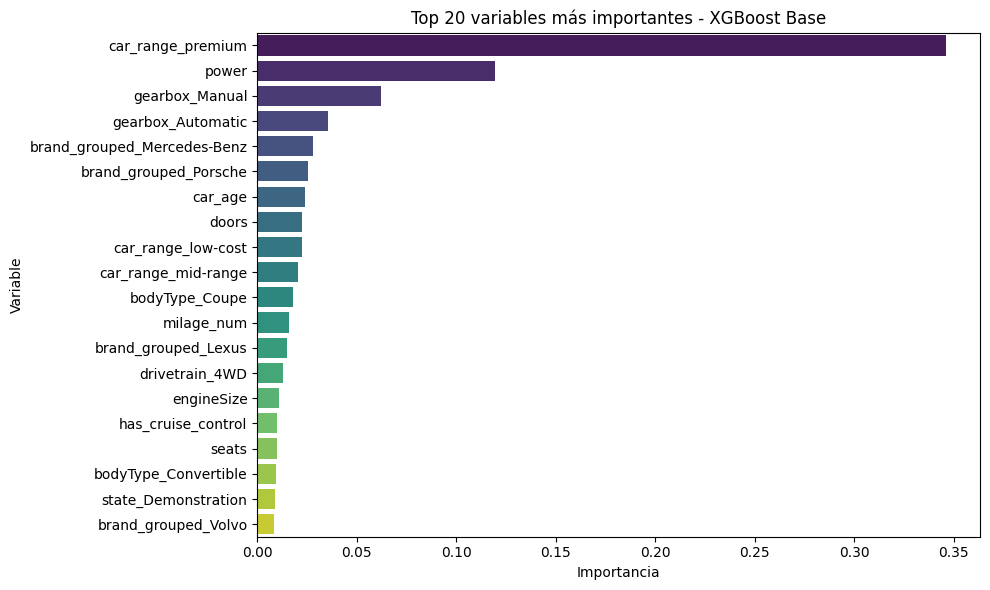

In [ ]:
# ✅ INSTALACIÓN
!pip install xgboost --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ✅ CARGA DE DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=["rawPrice"])
y = df["rawPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ MÉTRICA MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ ENTRENAMIENTO BASE DEL MODELO XGBOOST
xgb = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1,
                   subsample=0.8, colsample_bytree=0.8,
                   random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

# ✅ PREDICCIONES
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# ✅ EVALUACIÓN COMPLETA
print("🔍 Evaluación completa para: XGBoost Base")
print("─── TRAIN ───")
print(f"R² Score:  {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_train, y_train_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
print(f"MAPE:      {mape(y_train, y_train_pred):.2f} %")
print("─── TEST ───")
print(f"R² Score:  {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_test, y_test_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
print(f"MAPE:      {mape(y_test, y_test_pred):.2f} %")

# ✅ GRÁFICO REAL VS PREDICHO
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("XGBoost - Real vs Predicho")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.tight_layout()
plt.show()

# ✅ IMPORTANCIA DE VARIABLES
importancia = xgb.feature_importances_
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importancia})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title("Top 20 variables más importantes - XGBoost Base")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 48 candidates, totalling 144 fits
🔍 Evaluación completa para: XGBoost Optimizado
─── TRAIN ───
R² Score:  0.9944
MAE:       1156.60 €
RMSE:      1621.94 €
MAPE:      6.86 %
─── TEST ───
R² Score:  0.9325
MAE:       2699.39 €
RMSE:      5636.32 €
MAPE:      13.38 %


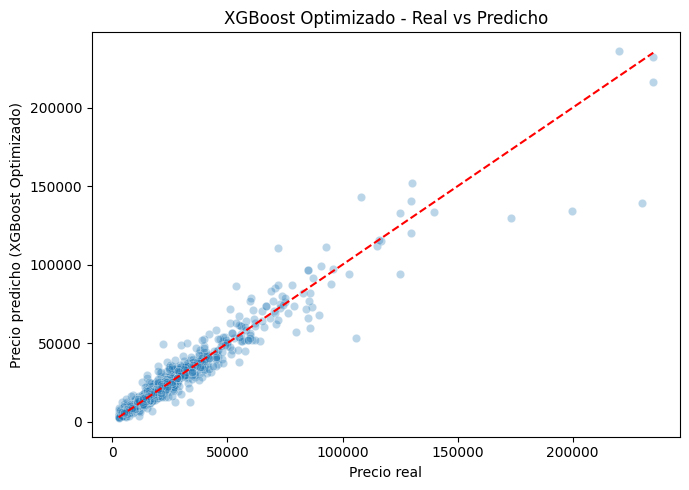

<ipython-input-19-23913b2a1a6a>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')


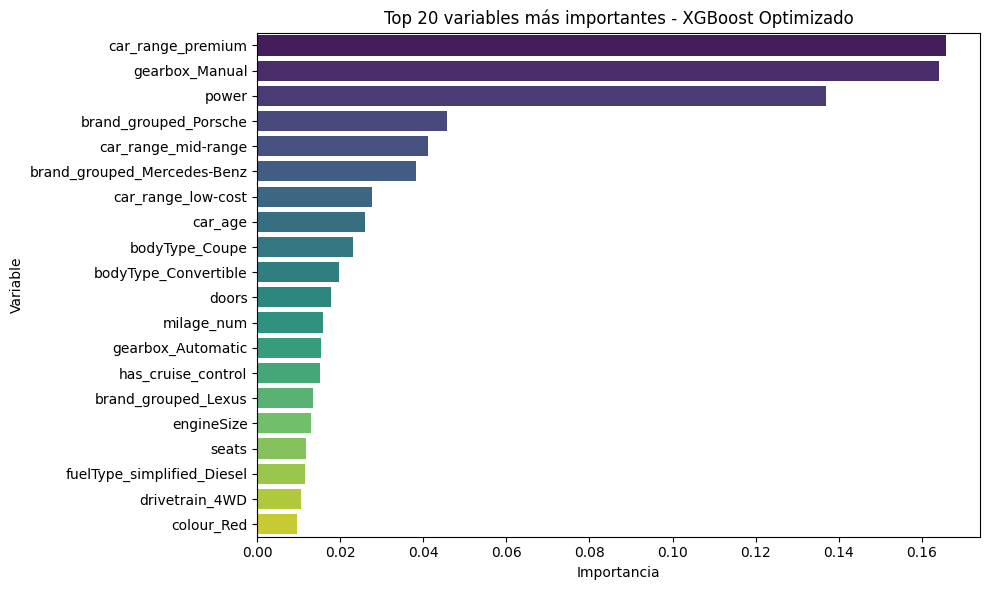

In [ ]:
# ✅ INSTALACIÓN
!pip install xgboost --quiet

# ✅ IMPORTACIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ✅ CARGA DE DATOS
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=["rawPrice"])
y = df["rawPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ MÉTRICA MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ GRIDSEARCHCV: REJILLA DE HIPERPARÁMETROS
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

# ✅ PREDICCIONES
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# ✅ EVALUACIÓN
print("🔍 Evaluación completa para: XGBoost Optimizado")
print("─── TRAIN ───")
print(f"R² Score:  {r2_score(y_train, y_train_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_train, y_train_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} €")
print(f"MAPE:      {mape(y_train, y_train_pred):.2f} %")
print("─── TEST ───")
print(f"R² Score:  {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE:       {mean_absolute_error(y_test, y_test_pred):.2f} €")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} €")
print(f"MAPE:      {mape(y_test, y_test_pred):.2f} %")

# ✅ GRÁFICO PREDICHO VS REAL
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho (XGBoost Optimizado)")
plt.title("XGBoost Optimizado - Real vs Predicho")
plt.tight_layout()
plt.show()

# ✅ IMPORTANCIA DE VARIABLES
importancia = best_xgb.feature_importances_
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importancia})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title("Top 20 variables más importantes - XGBoost Optimizado")
plt.tight_layout()
plt.show()


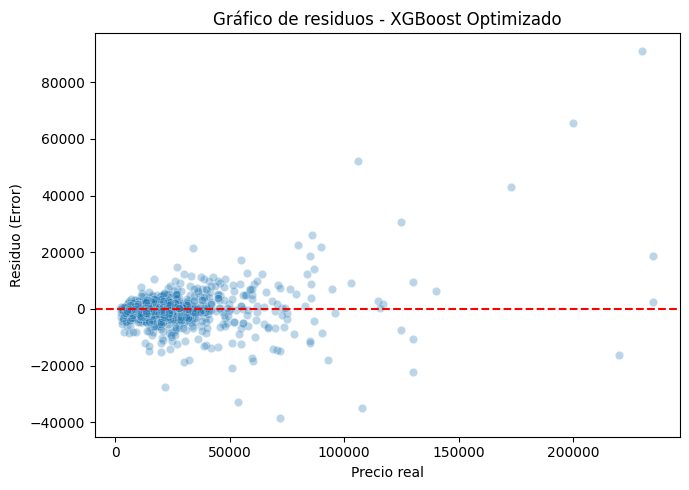

In [ ]:
# ✅ Cálculo de residuos
residuos_xgb = y_test - y_test_pred

# ✅ Gráfico de residuos
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=residuos_xgb, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Precio real")
plt.ylabel("Residuo (Error)")
plt.title("Gráfico de residuos - XGBoost Optimizado")
plt.tight_layout()
plt.show()


🔧 Mejor alpha Lasso: {'alpha': np.float64(0.001291549665014884)}
📊 Train (Lasso)
MAE: 4041.53
RMSE: 8761.06
R²: 0.836

📊 Test (Lasso)
MAE: 3850.08
RMSE: 8314.95
R²: 0.853

🔧 Mejor alpha Ridge: {'alpha': np.float64(10.0)}
📊 Train (Ridge)
MAE: 4033.57
RMSE: 8728.42
R²: 0.837

📊 Test (Ridge)
MAE: 3843.18
RMSE: 8318.45
R²: 0.853

🔧 Mejor combinación ElasticNet: {'alpha': np.float64(0.001), 'l1_ratio': 0.9}
📊 Train (ElasticNet)
MAE: 4038.06
RMSE: 8750.37
R²: 0.836

📊 Test (ElasticNet)
MAE: 3846.30
RMSE: 8318.41
R²: 0.853



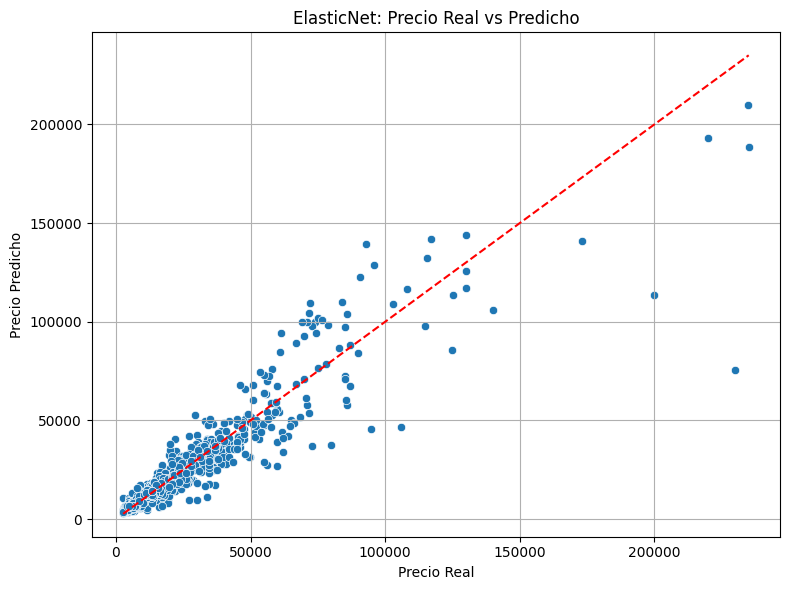

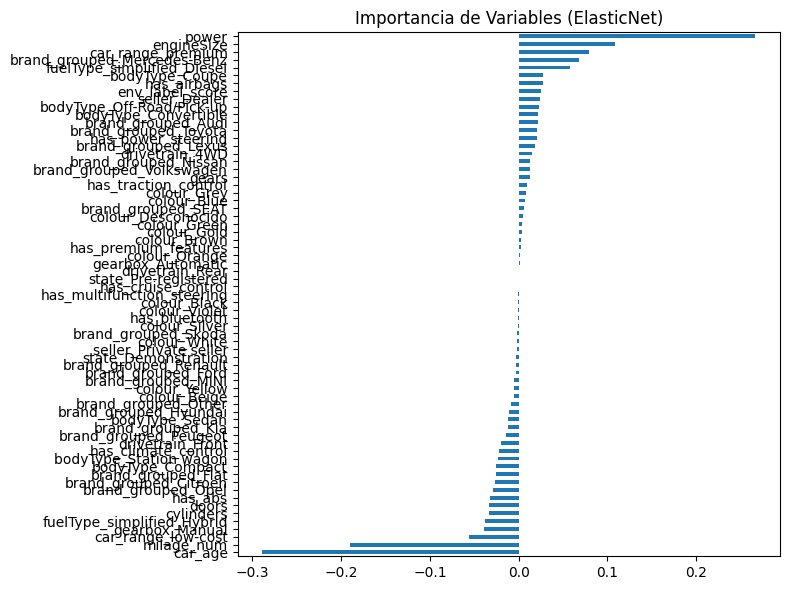

In [ ]:
# 📌 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 📌 2. Cargar datos (ajusta la ruta si usas Google Drive)
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")  # Cambia nombre si es necesario

# 📌 3. Variables
X = df.drop("rawPrice", axis=1)  # Predictoras
y = np.log(df["rawPrice"])       # Objetivo con log para mejorar ajuste

# 📌 4. Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 6. Evaluación con reversión de log
def evaluar(y_true_log, y_pred_log, dataset):
    y_true = np.exp(y_true_log)
    y_pred = np.exp(y_pred_log)
    print(f"📊 {dataset}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.3f}")
    print("")

# 📌 7. GridSearch para Lasso
params_lasso = {'alpha': np.logspace(-4, 1, 10)}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), params_lasso, cv=5)
lasso_grid.fit(X_train, y_train)

# Predicciones y evaluación
y_train_pred_lasso = lasso_grid.predict(X_train)
y_test_pred_lasso = lasso_grid.predict(X_test)

print("🔧 Mejor alpha Lasso:", lasso_grid.best_params_)
evaluar(y_train, y_train_pred_lasso, "Train (Lasso)")
evaluar(y_test, y_test_pred_lasso, "Test (Lasso)")

# 📌 8. GridSearch para Ridge
params_ridge = {'alpha': np.logspace(-4, 1, 10)}
ridge_grid = GridSearchCV(Ridge(), params_ridge, cv=5)
ridge_grid.fit(X_train, y_train)

y_train_pred_ridge = ridge_grid.predict(X_train)
y_test_pred_ridge = ridge_grid.predict(X_test)

print("🔧 Mejor alpha Ridge:", ridge_grid.best_params_)
evaluar(y_train, y_train_pred_ridge, "Train (Ridge)")
evaluar(y_test, y_test_pred_ridge, "Test (Ridge)")

# 📌 9. GridSearch para ElasticNet
params_elastic = {
    'alpha': np.logspace(-4, 1, 6),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
elastic_grid = GridSearchCV(ElasticNet(max_iter=10000), params_elastic, cv=5)
elastic_grid.fit(X_train, y_train)

y_train_pred_elastic = elastic_grid.predict(X_train)
y_test_pred_elastic = elastic_grid.predict(X_test)

print("🔧 Mejor combinación ElasticNet:", elastic_grid.best_params_)
evaluar(y_train, y_train_pred_elastic, "Train (ElasticNet)")
evaluar(y_test, y_test_pred_elastic, "Test (ElasticNet)")

# 📊 10. Gráfico Real vs Predicho (ElasticNet como ejemplo)
y_real = np.exp(y_test)
y_pred = np.exp(y_test_pred_elastic)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_real, y=y_pred)
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("ElasticNet: Precio Real vs Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 11. Importancia de variables (coeficientes ElasticNet)
coefs = pd.Series(elastic_grid.best_estimator_.coef_, index=X.columns)
coefs = coefs[coefs != 0]  # Solo coeficientes distintos de cero
coefs.sort_values().plot(kind="barh", figsize=(8,6), title="Importancia de Variables (ElasticNet)")
plt.tight_layout()
plt.show()


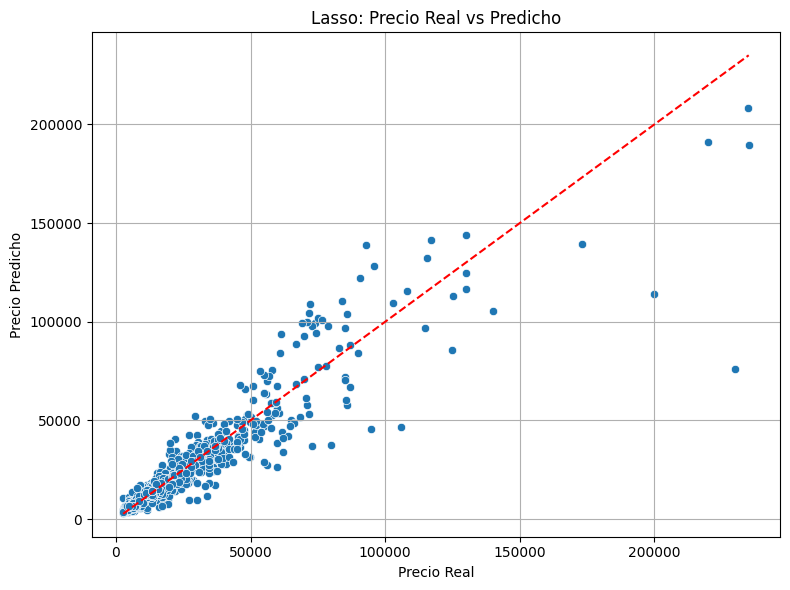

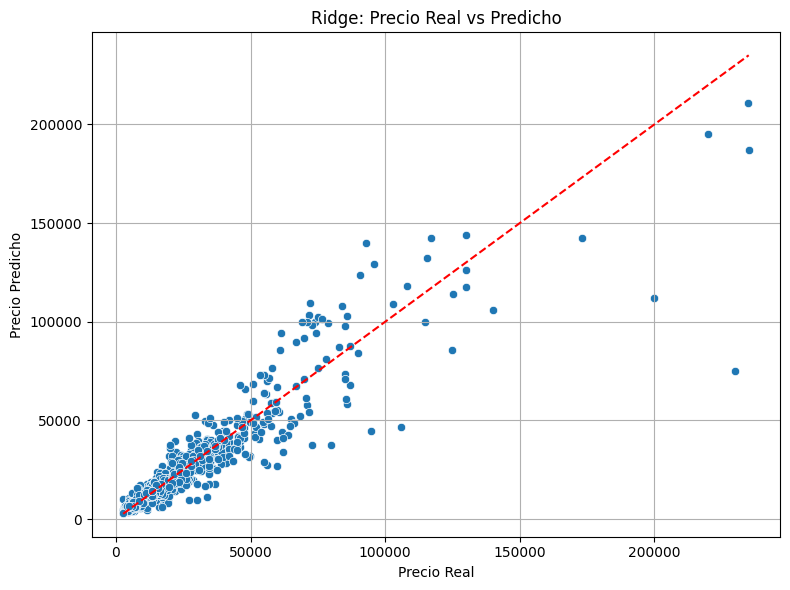

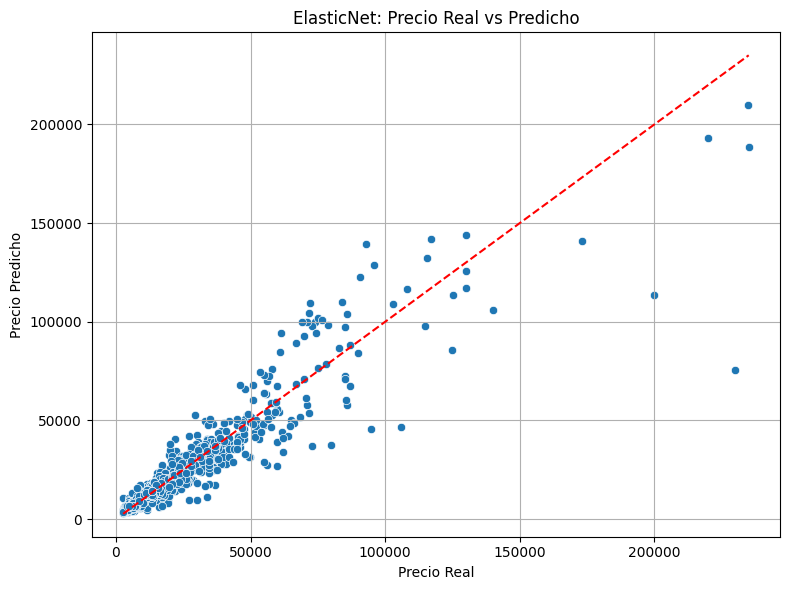

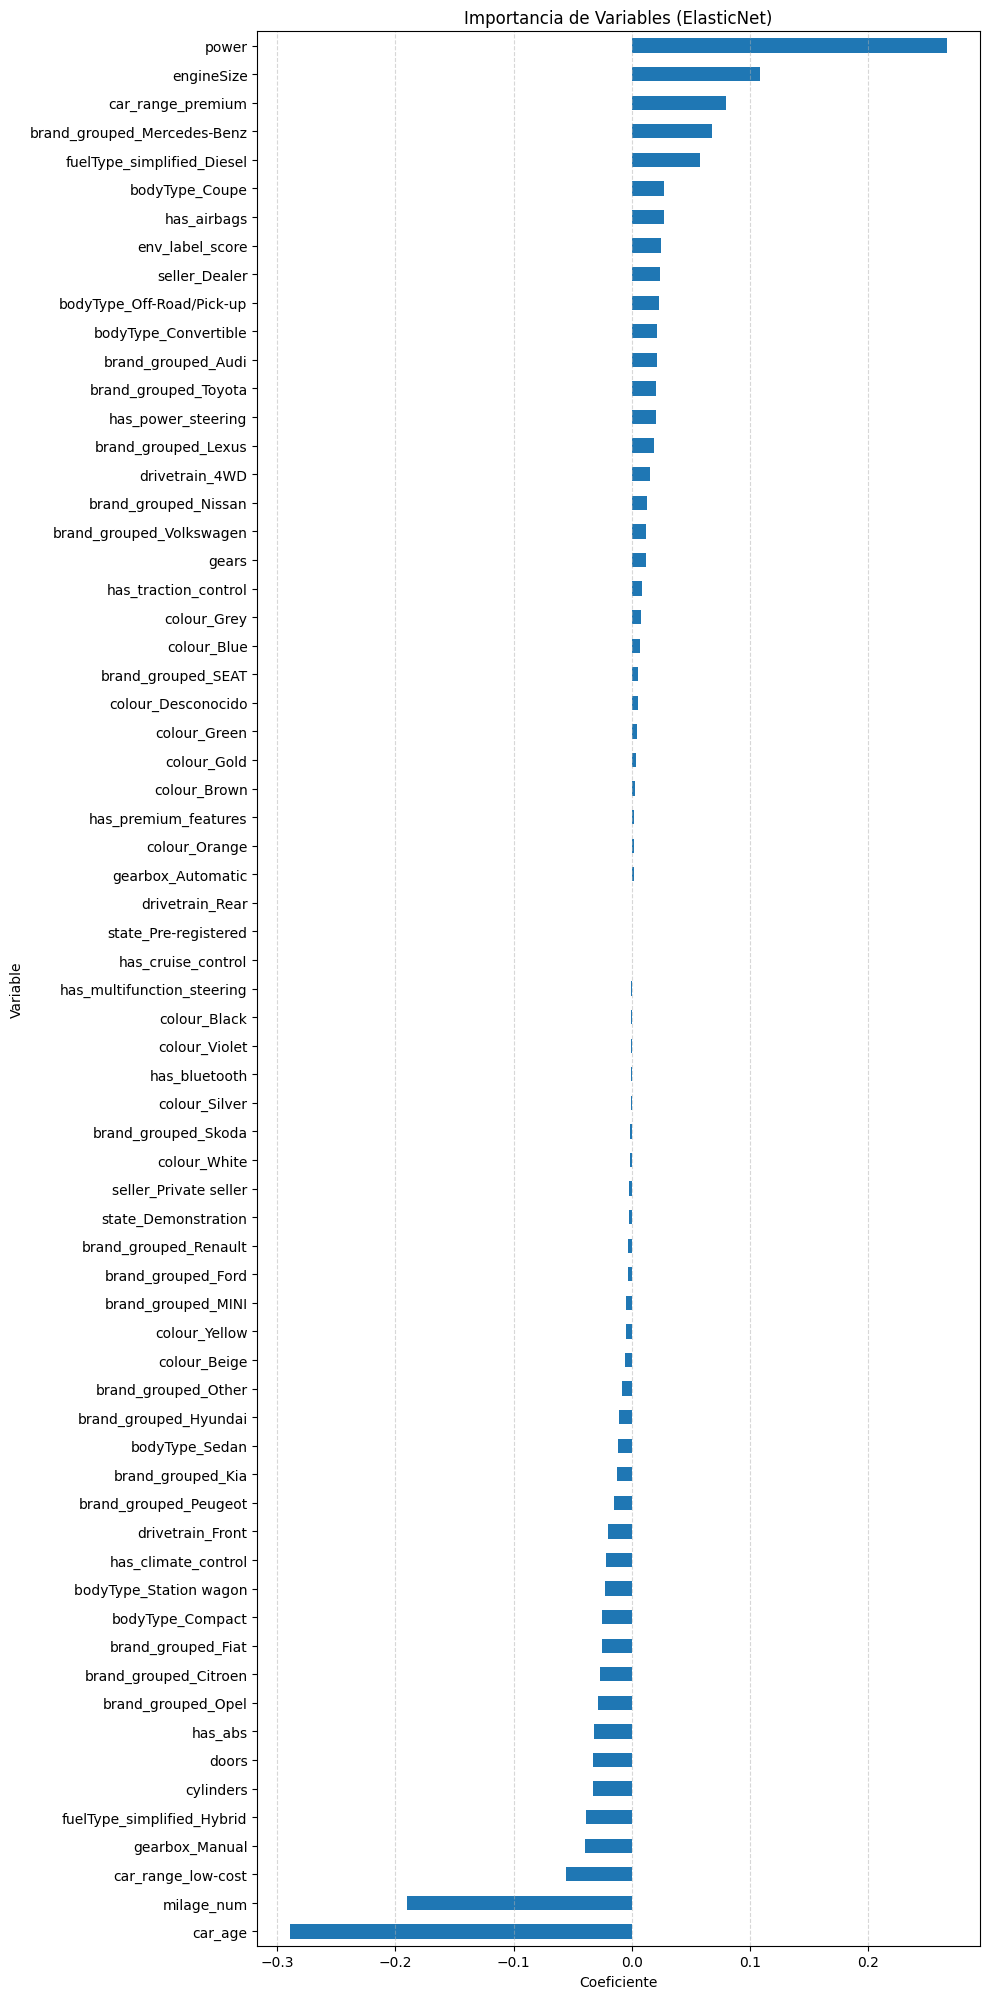

In [ ]:
# 📊 1. Función para gráfico Real vs Predicho
def plot_real_vs_pred(y_test_log, y_pred_log, modelo_nombre):
    y_real = np.exp(y_test_log)
    y_pred = np.exp(y_pred_log)

    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_real, y=y_pred)
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{modelo_nombre}: Precio Real vs Predicho")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 👉 2. Mostrar cada modelo por separado
plot_real_vs_pred(y_test, y_test_pred_lasso, "Lasso")
plot_real_vs_pred(y_test, y_test_pred_ridge, "Ridge")
plot_real_vs_pred(y_test, y_test_pred_elastic, "ElasticNet")

# 📊 3. Importancia de variables con nombres claros (ElasticNet como ejemplo)
coefs_elastic = pd.Series(elastic_grid.best_estimator_.coef_, index=X.columns)
coefs_elastic = coefs_elastic[coefs_elastic != 0].sort_values()

plt.figure(figsize=(10, len(coefs_elastic) * 0.3))
coefs_elastic.plot(kind="barh")
plt.title("Importancia de Variables (ElasticNet)")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📊 Train (Regresión Polinómica)
MAE: 2230.79
RMSE: 4455.94
R²: 0.958

📊 Test (Regresión Polinómica)
MAE: 13398060.53
RMSE: 481578696.33
R²: -492629729.909



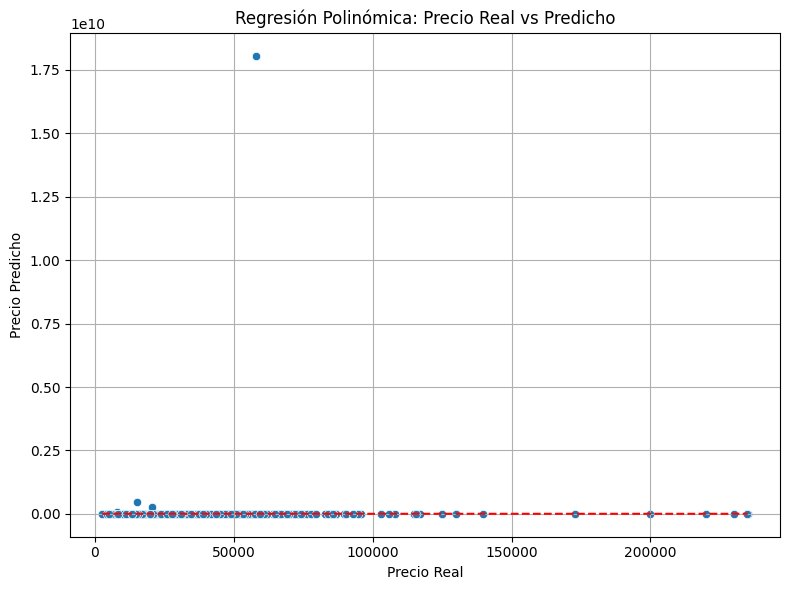

In [ ]:
# 📌 1. Importar librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 2. Cargar datos
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")  # Reemplaza con tu nombre de archivo

# 📌 3. Separar variables predictoras y objetivo (log)
X = df.drop("rawPrice", axis=1)
y = np.log(df["rawPrice"])

# 📌 4. División Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 5. Crear pipeline con transformación polinómica
degree = 2  # Puedes probar también con degree = 3 si quieres experimentar
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

# 📌 6. Entrenar el modelo
pipeline.fit(X_train, y_train)

# 📌 7. Predicción
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# 📌 8. Evaluación
def evaluar(y_real_log, y_pred_log, dataset):
    y_real = np.exp(y_real_log)
    y_pred = np.exp(y_pred_log)
    print(f"📊 {dataset}")
    print(f"MAE: {mean_absolute_error(y_real, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_real, y_pred)):.2f}")
    print(f"R²: {r2_score(y_real, y_pred):.3f}")
    print("")

evaluar(y_train, y_train_pred, "Train (Regresión Polinómica)")
evaluar(y_test, y_test_pred, "Test (Regresión Polinómica)")

# 📌 9. Gráfico Real vs Predicho
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.exp(y_test), y=np.exp(y_test_pred))
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()],
         [np.exp(y_test).min(), np.exp(y_test).max()],
         'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Polinómica: Precio Real vs Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Seleccionamos solo las columnas numéricas para la transformación polinómica
num_cols = ['car_age', 'milage_num', 'engineSize', 'power', 'cylinders', 'doors', 'gears']
X_num = df[num_cols]
X_bin = df.drop(['rawPrice'] + num_cols, axis=1)

# Concatenamos tras la transformación polinómica
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Pipeline solo para numéricas polinómicas
preprocessor = ColumnTransformer(transformers=[
    ('num_poly', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), num_cols),
    ('bin_passthrough', 'passthrough', X_bin.columns.tolist())
])

# Modelo completo
from sklearn.model_selection import train_test_split

X = df.drop("rawPrice", axis=1)
y = np.log(df["rawPrice"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluar(y_real_log, y_pred_log, dataset):
    y_real = np.exp(y_real_log)
    y_pred = np.exp(y_pred_log)
    print(f"📊 {dataset}")
    print(f"MAE: {mean_absolute_error(y_real, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_real, y_pred)):.2f}")
    print(f"R²: {r2_score(y_real, y_pred):.3f}")
    print("")

evaluar(y_train, y_pred_train, "Train (Polinómica corregida)")
evaluar(y_test, y_pred_test, "Test (Polinómica corregida)")


📊 Train (Polinómica corregida)
MAE: 3735.21
RMSE: 7797.78
R²: 0.870

📊 Test (Polinómica corregida)
MAE: 3680.70
RMSE: 7984.25
R²: 0.865



📊 Train (Polinómica corregida)
MAE: 3735.21
RMSE: 7797.78
R²: 0.870

📊 Test (Polinómica corregida)
MAE: 3680.70
RMSE: 7984.25
R²: 0.865



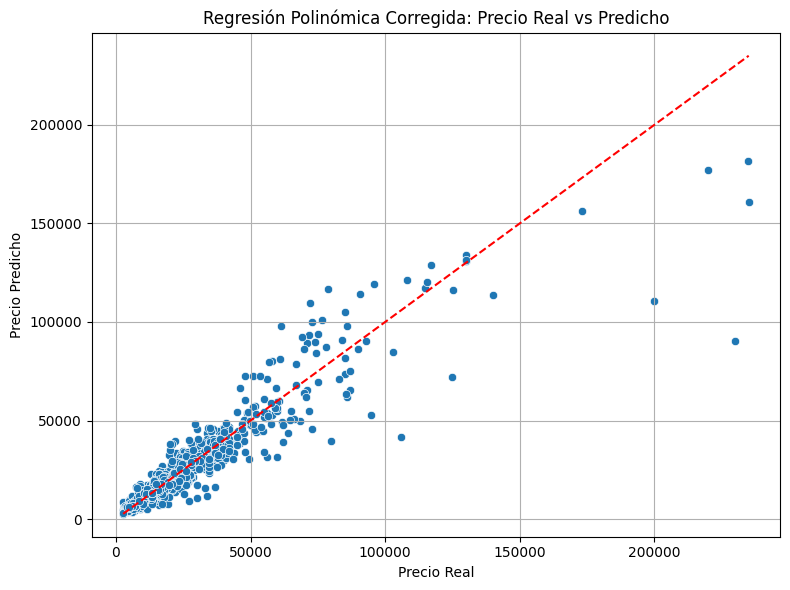

In [ ]:
# 📌 1. Librerías
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 2. Cargar datos
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")  # Cambia si es necesario

# 📌 3. Separar X e y
y = np.log(df["rawPrice"])  # Objetivo
X = df.drop("rawPrice", axis=1)

# 📌 4. Definir columnas numéricas y binarias
num_cols = ['car_age', 'milage_num', 'engineSize', 'power', 'cylinders', 'doors', 'gears']
bin_cols = [col for col in X.columns if col not in num_cols]

# 📌 5. Preprocesamiento por columnas
preprocessor = ColumnTransformer(transformers=[
    ('num_poly', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), num_cols),
    ('bin_passthrough', 'passthrough', bin_cols)
])

# 📌 6. Pipeline completo con regresión
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 📌 7. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 8. Entrenamiento
model.fit(X_train, y_train)

# 📌 9. Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 📌 10. Evaluación
def evaluar(y_true_log, y_pred_log, dataset):
    y_true = np.exp(y_true_log)
    y_pred = np.exp(y_pred_log)
    print(f"📊 {dataset}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.3f}")
    print("")

evaluar(y_train, y_pred_train, "Train (Polinómica corregida)")
evaluar(y_test, y_pred_test, "Test (Polinómica corregida)")

# 📌 11. Gráfico real vs predicho
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.exp(y_test), y=np.exp(y_pred_test))
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()],
         [np.exp(y_test).min(), np.exp(y_test).max()],
         'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Polinómica Corregida: Precio Real vs Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()


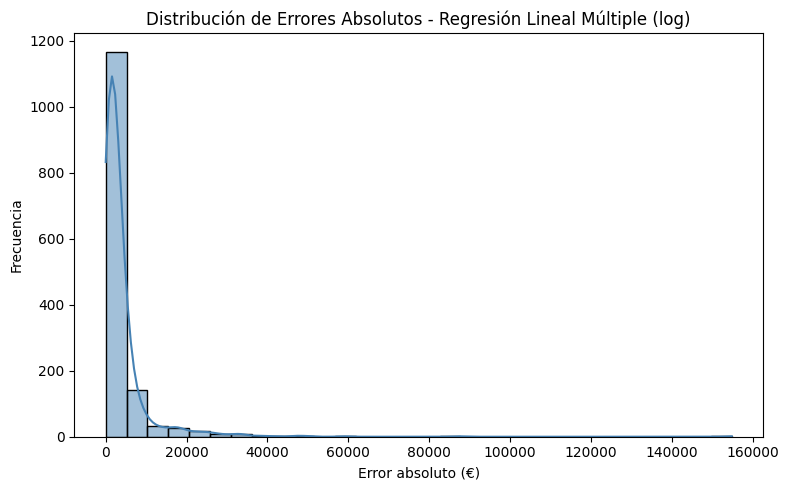

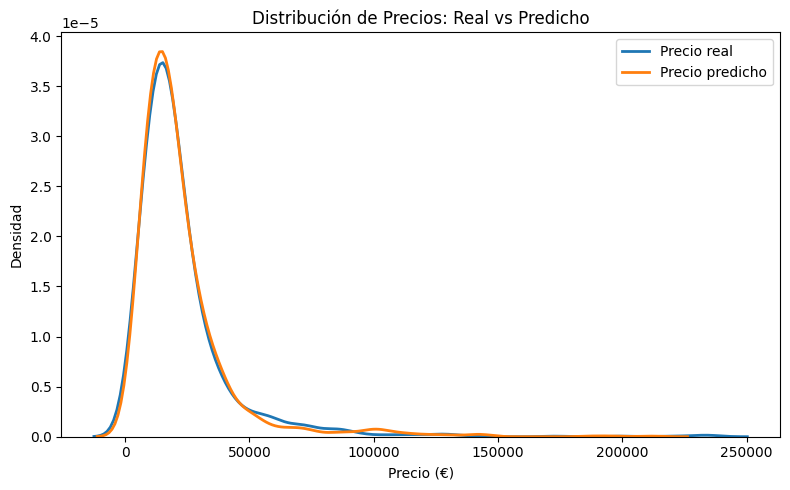

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = pd.read_excel("/content/dataset_modelado_final_completo.xlsx")
X = df.drop(columns=["rawPrice"])
y = df["rawPrice"]

# Transformación logarítmica
y_log = np.log1p(y)

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y test
X_train, X_test, y_train_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train_log)

# Predicciones en test
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_real = np.expm1(y_test_log)

# Cálculo de errores absolutos
errores_absolutos = np.abs(y_real - y_pred)

# Gráfico 1: Distribución de errores absolutos
plt.figure(figsize=(8, 5))
sns.histplot(errores_absolutos, bins=30, kde=True, color="steelblue")
plt.title("Distribución de Errores Absolutos - Regresión Lineal Múltiple (log)")
plt.xlabel("Error absoluto (€)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de precios reales vs predichos
plt.figure(figsize=(8, 5))
sns.kdeplot(y_real, label="Precio real", linewidth=2)
sns.kdeplot(y_pred, label="Precio predicho", linewidth=2)
plt.title("Distribución de Precios: Real vs Predicho")
plt.xlabel("Precio (€)")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()
